In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Dataset Description**
- The datasets consists of several medical predictor variables and one target variable, **
**Outcome[0.,1]**. 
- Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [10]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [11]:
X = df.drop(columns=['Outcome'],axis=1)
y = df['Outcome']
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [12]:
#Let's train the model with the whole data
cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(X,y)

DecisionTreeClassifier(random_state=42)

In [13]:
y_pred = cart_model.predict(X)
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       268

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768



In [18]:
#y_prob for AUC:
y_prob = cart_model.predict_proba(X)[:,1]
roc_auc_score(y,y_prob)

1.0

**predict_proba(X): This method returns the predicted probabilities for each class.
For binary classification, it returns an array of shape (n_samples, 2) — one column for the probability of class 0, and the other for class 1.**

In [20]:
#model training by train test split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape)
print(y_train.shape)

(537, 8)
(537,)


In [21]:
print(X_test.shape)
print(y_test.shape)

(231, 8)
(231,)


In [22]:
cart_model_v1 = DecisionTreeClassifier(random_state=42)
cart_model_v1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
y_test_pred = cart_model_v1.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_test_pred))

[[107  44]
 [ 25  55]]


Confusion Matrix: 
        Predicted
Actual [[ TP FN
          FP TN ]]

precision: Measures the proportion of correctly predicted positives out of all predicited positives.
recall(sensivity or True positive rate): Measures the porprotion of correctly prdicited positive out of all actual positives.


In [28]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76       151
           1       0.56      0.69      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.70      0.71       231



In [30]:
y_test_proba = cart_model_v1.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_test_proba)

0.6980546357615895

In [33]:
# cross validate the result to achieve more accuracy
# cross validation 
from sklearn.model_selection import cross_validate
cart_model_cv = DecisionTreeClassifier(random_state=42).fit(X,y)
cv_result = cross_validate(
    cart_model_cv, 
    X, y, 
    cv = 10, 
    scoring=["accuracy","precision","recall","f1","roc_auc"]
)
cv_result

{'fit_time': array([0.00799441, 0.00899529, 0.00799608, 0.00899625, 0.00800467,
        0.00899386, 0.00900126, 0.00910211, 0.00850797, 0.00700259]),
 'score_time': array([0.01100826, 0.01100326, 0.01400328, 0.01101375, 0.01754212,
        0.01599956, 0.01800203, 0.01604319, 0.01400328, 0.01499748]),
 'test_accuracy': array([0.67532468, 0.72727273, 0.67532468, 0.5974026 , 0.68831169,
        0.67532468, 0.80519481, 0.76623377, 0.65789474, 0.75      ]),
 'test_precision': array([0.53846154, 0.63636364, 0.53125   , 0.42857143, 0.57142857,
        0.53571429, 0.73076923, 0.65517241, 0.5       , 0.64      ]),
 'test_recall': array([0.51851852, 0.51851852, 0.62962963, 0.44444444, 0.44444444,
        0.55555556, 0.7037037 , 0.7037037 , 0.46153846, 0.61538462]),
 'test_f1': array([0.52830189, 0.57142857, 0.57627119, 0.43636364, 0.5       ,
        0.54545455, 0.71698113, 0.67857143, 0.48      , 0.62745098]),
 'test_roc_auc': array([0.63925926, 0.67925926, 0.66481481, 0.56222222, 0.63222222,
 

In [34]:
cv_result['test_accuracy'].mean()

0.7018284347231716

In [35]:
cv_result['test_precision'].mean(), cv_result['test_recall'].mean(), cv_result['test_f1'].mean()

(0.5767731105101794, 0.5595441595441596, 0.566082336751894)

In [36]:
cv_result['test_roc_auc'].mean()

0.6687720797720798

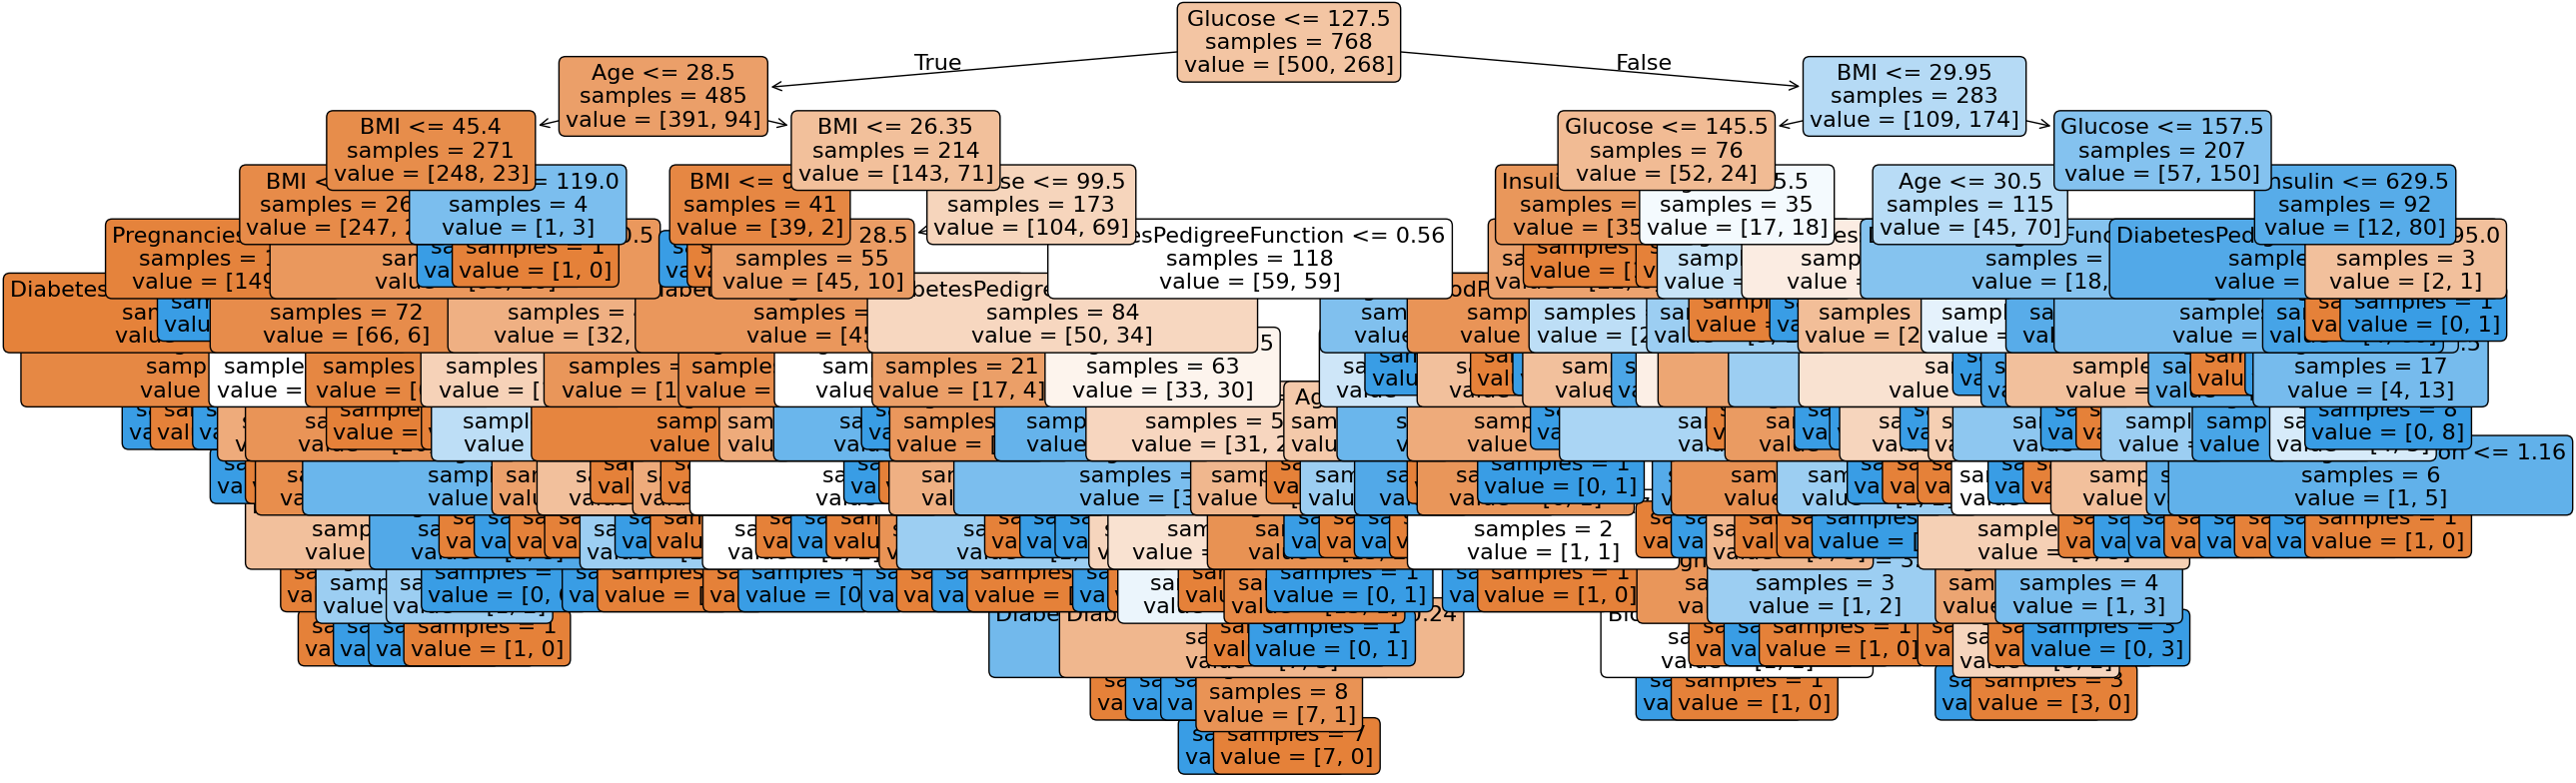

In [38]:
from sklearn.tree import plot_tree
# Visualize the decision tree
plt.figure(figsize=(26,8))
plot_tree(cart_model, feature_names=X.columns, filled=True, rounded=True, impurity=False, fontsize=16, precision=2)
plt.tight_layout()
plt.show()

In [37]:
cart_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}